# Madhur Jaripatke
### Roll No. 48
### TE A Computer
### RMDSSOE, Warje, Pune

###  4. Data Analytics, I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing 
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains 
information about various houses in Boston through different parameters. There are 506 samples 
and 14 feature variables in this dataset. 
The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
df = pd.read_csv('Datasets/HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Data Preprocessing

In [3]:
df.shape

(506, 14)

In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())
df['ZN'] = df['ZN'].fillna(df['ZN'].mean())
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mean())
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mean())
df['AGE'] = df['AGE'].fillna(df['NOX'].mean())
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
x = df.drop('MEDV', axis=1)
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [8]:
y = df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

# Splitting the dataset into Training set & Test set

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.358090,0.0,6.200000,1.000000,0.507,6.951,88.5,2.8617,8,307,17.4,391.70,9.71
71,0.158760,0.0,10.810000,0.000000,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88
240,0.113290,30.0,4.930000,0.069959,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38
6,0.088290,12.5,7.870000,0.069959,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
417,25.940600,0.0,18.100000,0.000000,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.283920,0.0,7.380000,0.000000,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
192,3.611874,45.0,3.440000,0.000000,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
117,0.150980,0.0,10.010000,0.000000,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
47,0.229270,0.0,11.083992,0.000000,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80


# Training the Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train.values, y_train.values)

LinearRegression()

In [12]:
y_train_pred = model.predict(x_train.values)
y_test_pred = model.predict(x_test.values)

In [13]:
y_train_pred

array([32.66475357, 22.54760255, 27.92272071, 23.625425  ,  6.45861412,
       13.93671818, 21.99813652, 29.37255546, 32.26120163, 12.96973779,
       19.94017093, 21.45691431, 12.8839238 , 23.92943611,  5.97521446,
       18.93574189,  9.22524241, 45.33468083, 30.74460224, 17.25459323,
       17.76350511, 21.90996473, 23.29496036, 18.97171185, 34.91668639,
       13.50648784, 20.87214382, 35.52772443, 19.06816761, 13.54186364,
       13.76659184, 22.07218103, 14.98269752, 31.34278627, 25.39744809,
       16.1870452 , 24.86653661,  9.63533679, 15.04079584, 21.9231712 ,
       33.08970263, 28.30793582, 26.6815381 , 15.31770869, 31.83213513,
       25.30973944, 14.15787572,  7.92149041, 27.76577059, 25.30401239,
        4.99697272, 28.22349867, 16.77086549, 29.86368234, 19.11821305,
       16.15376997, 18.41077744, 12.7567695 ,  8.79391708, 19.05618572,
       35.71550638, 32.72210532, 23.71015905, 20.18648812, 22.93000843,
       26.44974296, 21.0615435 , 17.69830015, 32.39856766, 10.49

In [14]:
model.predict([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])

array([30.66239417])

In [15]:
y_test_pred

array([26.38244903, 22.48142477, 28.9150927 , 11.51311019, 21.55596144,
       19.39569936, 20.24684687, 21.42696075, 19.34116377, 19.68860665,
        4.16870305, 15.92252628, 16.82679893,  5.33336826, 39.08414873,
       33.13236137, 21.86276797, 36.51777073, 31.70654122, 23.61115389,
       24.93638896, 23.41076277, 20.78702452, 30.60639121, 22.78779124,
        8.34225949, 17.46512364, 17.83410415, 35.88821362, 21.01664412,
       17.72326132, 17.42852689, 19.15036073, 23.30738941, 30.794513  ,
       19.22448935, 11.2795003 , 23.85638994, 17.65920118, 15.27836886,
       26.42841366, 21.60671364, 23.86193607, 14.66954994, 23.89469709,
       24.73879055, 19.95659189, 23.04414555, 10.49937272, 24.42914586,
       23.54775421, 18.98321991, 24.46540719, 31.13192075, 12.69208308,
       22.46866718, 21.36471519, 15.97301174, 12.04261875, 22.54049973,
       18.20501757, 21.91741417, 32.62538174, 31.43041916, 17.56480551,
       33.25033675, 21.22233526, 19.67388402, 19.97829012, 24.07

In [16]:
y_train

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: MEDV, Length: 404, dtype: float64

In [17]:
y_test

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: MEDV, Length: 102, dtype: float64

In [18]:
df1 = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [19]:
df1


,Actual,Predicted
220,26.7,32.664754
71,21.7,22.547603
240,22.0,27.922721
6,22.9,23.625425
417,10.4,6.458614
...,...,...
323,18.5,19.173695
192,36.4,33.430366
117,19.2,23.574051
47,16.6,18.034918


In [20]:
df2

,Actual,Predicted
329,22.6,26.382449
371,50.0,22.481425
219,23.0,28.915093
403,8.3,11.513110
78,21.2,21.555961
...,...,...
56,24.7,25.320713
455,14.1,15.408698
60,18.7,17.510790
213,28.1,25.885564


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
mse

35.893643434646215

In [22]:
mse = mean_squared_error(y_train, y_train_pred)
mse

19.805844906182962

In [23]:
r2 = r2_score(y_test, y_test_pred)
r2

0.5592001535561669

# Visualizing the Results

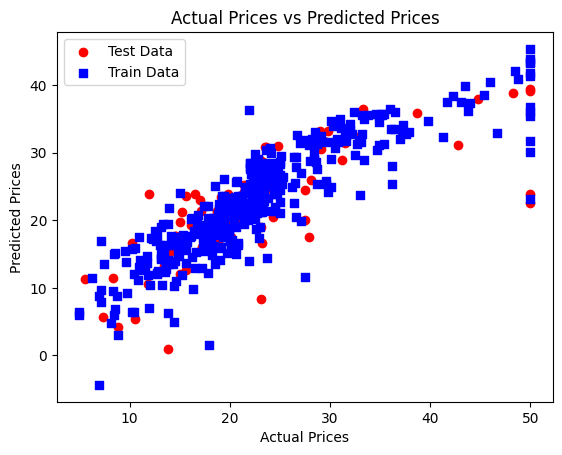

In [24]:
plt.scatter(y_test, y_test_pred, c='red', marker='o', label='Test Data')
plt.scatter(y_train, y_train_pred, c='blue', marker='s', label='Train Data')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.legend(loc='upper left')
plt.plot()
plt.show()